In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
salary=pd.read_csv('Salary_Data.csv')

salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
X=salary.iloc[:,0].values
y=salary.iloc[:,-1].values

In [12]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [24]:
class LinearRegressionGD():
    def __init__(self):
        self.m=0
        self.b=0
    def derivative(self,X,y):
        y_pred=self.m * X + self.b
        ss_dm=(2) * sum (X * (y_pred - y))
        ss_db=(2) * sum (y_pred - y)
        return ss_dm , ss_db
    def fit(self,X,y):
        for _ in range(1000):
            learning_rate=0.001
            ss_m,ss_b=self.derivative(X,y)
            
            if (ss_m == 'Nan' or ss_b=='Nan'):
                return self
            else:
                self.m = self.m - (ss_m * learning_rate)
                self.b = self.b - (ss_b * learning_rate)
        return self
    def predict(self , X_test):
            y_pred = self.m * X_test + self.b
            return y_pred

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2) 

In [26]:
regressor_gradient_descent=LinearRegressionGD()

In [27]:
regressor_gradient_descent.fit(X_train,y_train)

In [29]:
y_pred = regressor_gradient_descent.predict(X_test)

y_pred

array([ 82220.83395822, 125797.5325057 , 108745.78090016,  65169.08235269,
        74642.27768909,  90746.70976099])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9493429993990511

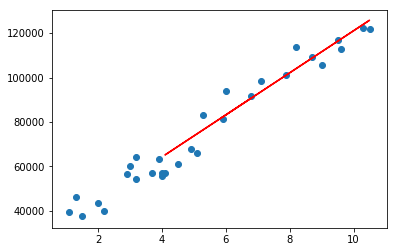

In [43]:
plt.plot(X_test,y_pred,color='red')
plt.scatter(X,y)